#  1th senario

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'D:\\training\\data science\\Rahimyan\\researching\\modeling'

In [3]:
df=pd.read_csv('bank datasets.csv')
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [4]:
df_copy=df.copy(deep=True)

In [5]:
df_copy.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df_copy.shape

(10000, 14)

In [8]:
df_copy.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df_copy

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
pd.isnull(df_copy).sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df_copy.duplicated().sum()

0

### transforming Geography to numerical column

In [12]:
df_copy.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
int_Geography=[]
for i in df_copy['Geography']:
    if i=="France":
        int_Geography.append(1)
    elif i=="Germany":
        int_Geography.append(2)
    else :
        int_Geography.append(3)
df_copy['int_Geography']=int_Geography
df_copy=df_copy.drop(['Geography'],axis=1)

df_copy

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,int_Geography
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,3
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,9997,15569892,Johnstone,516,Male,35,10,57369.61,1,1,1,101699.77,0,1
9997,9998,15584532,Liu,709,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,9999,15682355,Sabbatini,772,Male,42,3,75075.31,2,1,0,92888.52,1,2


### transforming Gender to numerical column

In [14]:
int_Gender=[]
for i in df_copy['Gender']:
    if i=="Female":
        int_Gender.append(1)
    elif i=="Male":
        int_Gender.append(2)

df_copy['int_Gender']=int_Gender
df_copy=df_copy.drop(['Gender'],axis=1)

df_copy

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,int_Geography,int_Gender
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,1
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,3,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,1
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,1
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,2
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,2
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,1
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,2,2


In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
 12  int_Geography    10000 non-null  int64  
 13  int_Gender       10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [16]:
df_copy.CustomerId.value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

In [17]:
df_copy=df_copy.drop(['RowNumber','CustomerId'],axis=1)

### correlation between data columns

In [18]:
df_copy.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,int_Geography,int_Gender
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.007888,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.022812,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.003739,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.069408,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.003972,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.008523,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.006724,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.001369,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.035943,-0.106512
int_Geography,0.007888,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943,1.000000,0.004719


## product analysing

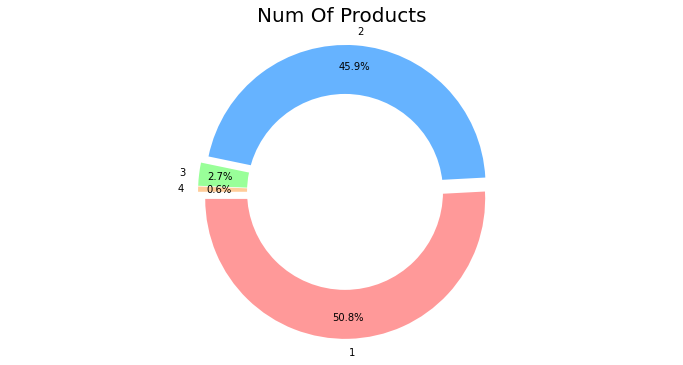

In [19]:
fig, axs = plt.subplots(figsize=(12,6))
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
sizes = [df_copy.NumOfProducts[df_copy['NumOfProducts']==1].count(), df_copy.NumOfProducts[df_copy['NumOfProducts']==2].count(), df_copy.NumOfProducts[df_copy['NumOfProducts']==3].count(), df_copy.NumOfProducts[df_copy['NumOfProducts']==4].count()]
axs.pie(sizes,labels=['1', '2','3','4'],explode=(0.05,0.05,0.05,0.05) , autopct='%1.1f%%',pctdistance=0.85,colors=colors, startangle=180 )
center_circle=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)
axs.axis('equal')
plt.title("Num Of Products", size = 20)
#plt.tight_layout()
plt.show()

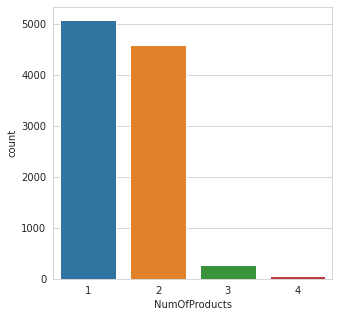

In [20]:
plt.figure(figsize = (5,5))
with sns.axes_style("whitegrid"):
    sns.countplot( x = "NumOfProducts",data = df_copy )


In [21]:
# calculating share of each product
products=df_copy['NumOfProducts'].value_counts().to_frame(name = 'size').reset_index()

share_percent_products=[]
for i in products['size']:
    share_percent_products.append(round((i/products['size'].sum()),2))
products['share_percent_products']=share_percent_products

#products.loc['sum','size']=products['size'].sum()
#products.loc['sum','index']='sum'
#products.loc['sum','share_percent_products']=1
products

,index,size,share_percent_products
0,1,5084,0.51
1,2,4590,0.46
2,3,266,0.03
3,4,60,0.01


### products per categorical featurse

In [22]:
# calculating share percentage of each features per products
from itertools import product

crosstable_Exited=round(pd.crosstab(df_copy['NumOfProducts'],df_copy['Exited'],normalize='index'),2)
crosstable_int_Gender=round(pd.crosstab(df_copy['NumOfProducts'],df_copy['int_Gender'],normalize='index'),2)
crosstable_int_Geography=round(pd.crosstab(df_copy['NumOfProducts'],df_copy['int_Geography'],normalize='index'),2)
crosstable_IsActiveMember=round(pd.crosstab(df_copy['NumOfProducts'],df_copy['IsActiveMember'],normalize='index'),2)
crosstable_HasCrCard=round(pd.crosstab(df_copy['NumOfProducts'],df_copy['HasCrCard'],normalize='index'),2)
crosstable_Tenure=round(pd.crosstab(df_copy['NumOfProducts'],df_copy['Tenure'],normalize='index'),2)

In [23]:
#share percentage of Existed per products
crosstable_Exited

Exited,0,1
NumOfProducts,,
1,0.72,0.28
2,0.92,0.08
3,0.17,0.83
4,0.00,1.00


In [24]:
# consistent ratio of Exsited
my_cols = ['Non-Exited','Exited']
Exi_ratio=pd.DataFrame()

for i in range(0,2):
    for j in range(0,4):
        Exi_ratio.loc[j,my_cols[i]]=((crosstable_Exited.iloc[j,i])/(products.loc[j,'share_percent_products']))
Exi_ratio

,Non-Exited,Exited
0,1.411765,0.549020
1,2.000000,0.173913
2,5.666667,27.666667
3,0.000000,100.000000


In [25]:
#share percentage of int_Gender per products
crosstable_int_Gender

int_Gender,1,2
NumOfProducts,,
1,0.45,0.55
2,0.45,0.55
3,0.56,0.44
4,0.63,0.37


In [26]:
# consistent ratio of int_Gender 
my_cols = ['Female','Male']
Gen_ratio=pd.DataFrame()

for i in range(0,2):
    for j in range(0,4):
        Gen_ratio.loc[j,my_cols[i]]=((crosstable_int_Gender.iloc[j,i])/(products.loc[j,'share_percent_products']))
Gen_ratio

,Female,Male
0,0.882353,1.078431
1,0.978261,1.195652
2,18.666667,14.666667
3,63.000000,37.000000


In [27]:
#share percentage of int_Geography per products
crosstable_int_Geography

int_Geography,1,2,3
NumOfProducts,,,
1,0.49,0.27,0.24
2,0.52,0.23,0.26
3,0.39,0.36,0.25
4,0.48,0.40,0.12


In [28]:
# consistent ratio of int_Geography 
my_cols = ['France','Germany','Spain']
Geog_ratio=pd.DataFrame()

for i in range(0,3):
    for j in range(0,4):
        Geog_ratio.loc[j,my_cols[i]]=((crosstable_int_Geography.iloc[j,i])/(products.loc[j,'share_percent_products']))
Geog_ratio

,France,Germany,Spain
0,0.960784,0.529412,0.470588
1,1.130435,0.500000,0.565217
2,13.000000,12.000000,8.333333
3,48.000000,40.000000,12.000000


In [29]:
#share percentage of IsActiveMember per products
crosstable_IsActiveMember

IsActiveMember,0,1
NumOfProducts,,
1,0.50,0.50
2,0.47,0.53
3,0.58,0.42
4,0.52,0.48


In [30]:
# consistent ratio of IsActiveMember
my_cols = ['Non-Active','Active']
active_ratio=pd.DataFrame()

for i in range(0,2):
    for j in range(0,4):
        active_ratio.loc[j,my_cols[i]]=((crosstable_IsActiveMember.iloc[j,i])/(products.loc[j,'share_percent_products']))
active_ratio

,Non-Active,Active
0,0.980392,0.980392
1,1.021739,1.152174
2,19.333333,14.000000
3,52.000000,48.000000


In [31]:
#share percentage of HasCrCard per products
crosstable_HasCrCard

HasCrCard,0,1
NumOfProducts,,
1,0.30,0.70
2,0.29,0.71
3,0.29,0.71
4,0.32,0.68


In [32]:
# consistent ratio of HasCrCard
my_cols = ['non-CrCard','CrCard']
CrCard_ratio=pd.DataFrame()

for i in range(0,2):
    for j in range(0,4):
        CrCard_ratio.loc[j,my_cols[i]]=((crosstable_HasCrCard.iloc[j,i])/(products.loc[j,'share_percent_products']))
CrCard_ratio

,non-CrCard,CrCard
0,0.588235,1.372549
1,0.630435,1.543478
2,9.666667,23.666667
3,32.000000,68.000000


In [33]:
#share percentage of Tenure per products
crosstable_Tenure

Tenure,0,1,2,3,4,5,6,7,8,9,10
NumOfProducts,,,,,,,,,,,
1,0.05,0.11,0.09,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.05
2,0.04,0.09,0.12,0.09,0.10,0.10,0.10,0.11,0.10,0.10,0.05
3,0.02,0.12,0.08,0.16,0.08,0.14,0.06,0.09,0.11,0.09,0.06
4,0.00,0.07,0.18,0.13,0.05,0.12,0.07,0.08,0.07,0.17,0.07


In [34]:
# consistent ratio of Tenure
my_cols = ['0','1','2','3','4','5','6','7','8','9','10']
Tenure_ratio=pd.DataFrame()

for i in range(0,11):
    for j in range(0,4):
        Tenure_ratio.loc[j,my_cols[i]]=((crosstable_Tenure.iloc[j,i])/(products.loc[j,'share_percent_products']))
Tenure_ratio

,0,1,2,3,4,5,6,7,8,9,10
0,0.098039,0.215686,0.176471,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.196078,0.098039
1,0.086957,0.195652,0.260870,0.195652,0.217391,0.217391,0.217391,0.239130,0.217391,0.217391,0.108696
2,0.666667,4.000000,2.666667,5.333333,2.666667,4.666667,2.000000,3.000000,3.666667,3.000000,2.000000
3,0.000000,7.000000,18.000000,13.000000,5.000000,12.000000,7.000000,8.000000,7.000000,17.000000,7.000000


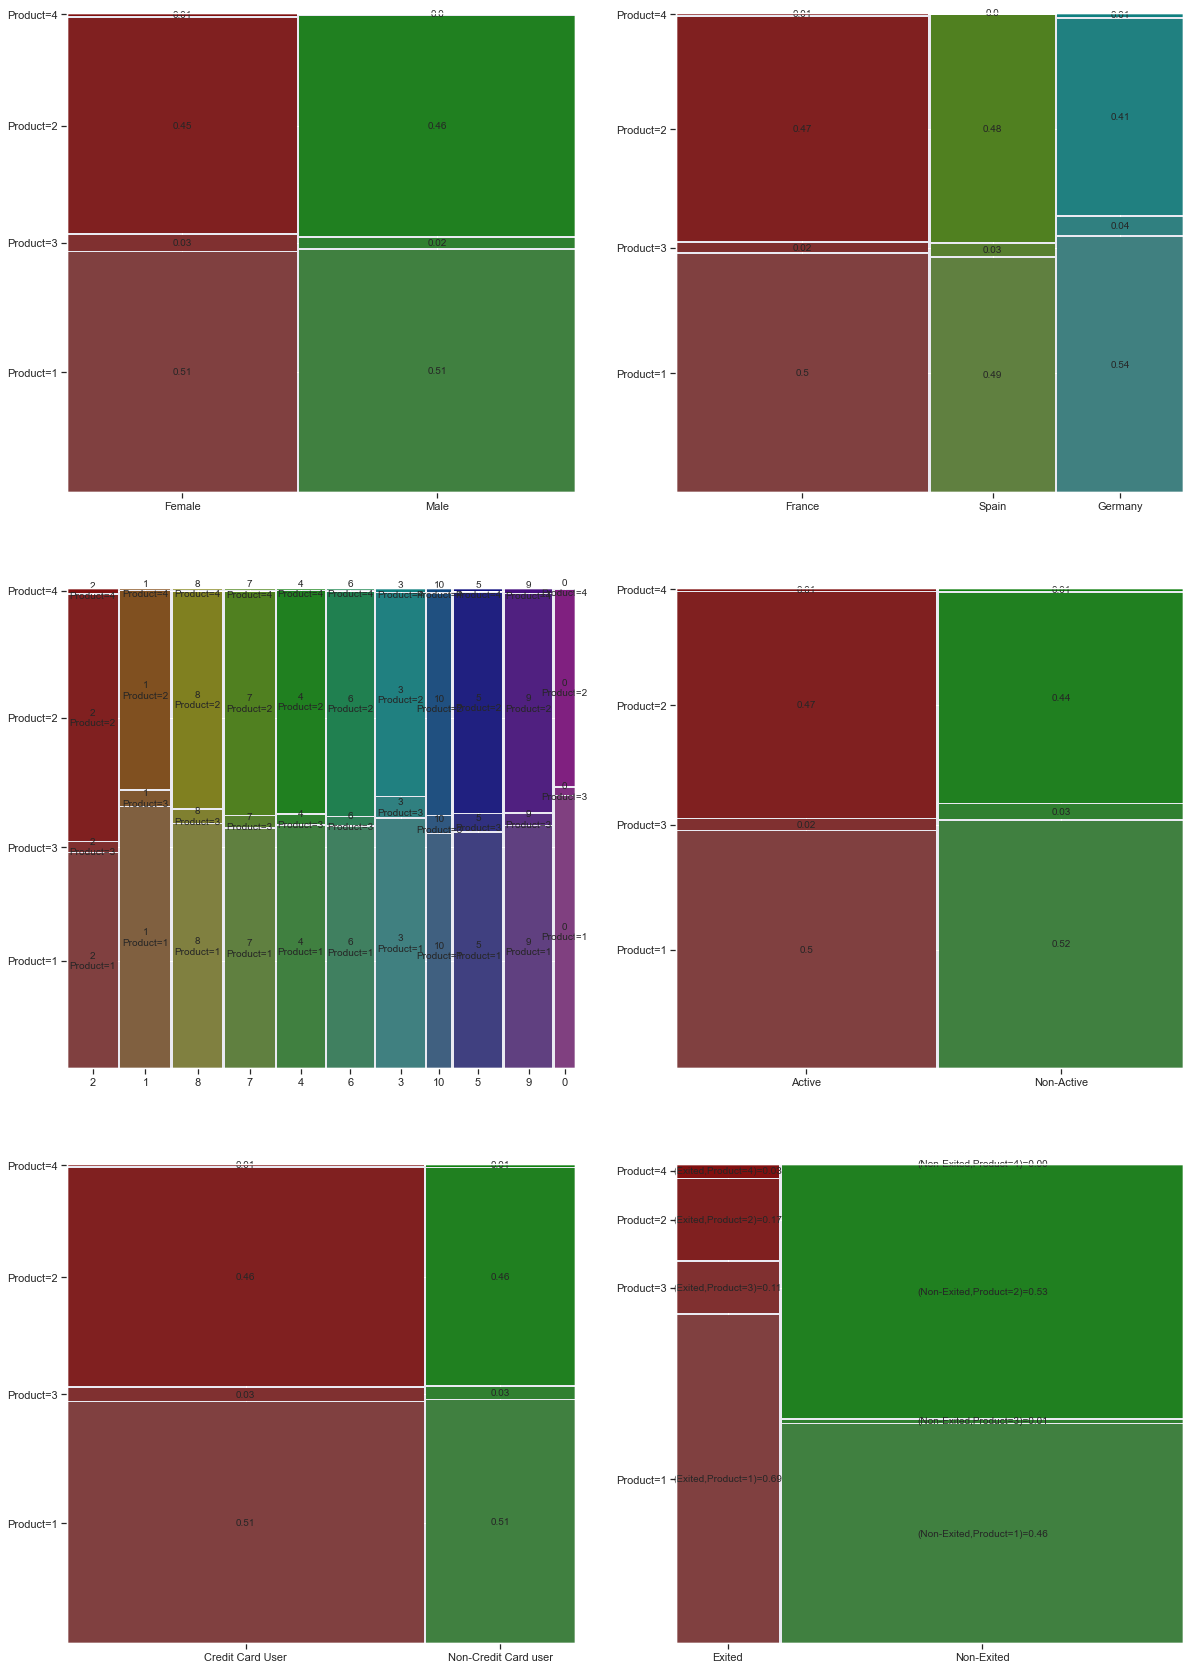

In [35]:
# visualize share percentage of features per product
from statsmodels.graphics.mosaicplot import mosaic

sns.set(rc = {'figure.figsize':(20,30)})
#sns.set_theme(palette="crest_r")
fig,axs = plt.subplots(3,2)
cd =  df_copy.copy(deep=True)
cd['Exited'] = np.where(cd['Exited']==1,"Exited","Non-Exited")
cd['int_Gender'] = np.where(cd['int_Gender']==1,"Female","Male")
cd['int_Geography'] = np.where(cd['int_Geography']==1,"France",(np.where(cd['int_Geography']==2,"Germany","Spain")))
cd['IsActiveMember'] = np.where(cd['IsActiveMember']==1,"Active","Non-Active")
cd['HasCrCard'] = np.where(cd['HasCrCard']==1,"Credit Card User","Non-Credit Card user")
cd['NumOfProducts'] = np.where(cd['NumOfProducts']==1,"Product=1",
                               (np.where(cd['NumOfProducts']==2,"Product=2",
                                         (np.where(cd['NumOfProducts']==3,"Product=3","Product=4")))))
mosaic(cd,['int_Gender','NumOfProducts'],ax=axs[0,0],labelizer=lambda  k:{('Female','Product=1'):0.51,('Female','Product=2'):0.45,
                                                                          ('Female','Product=3'):0.03,('Female','Product=4'):0.01,
                                                                          ('Male','Product=1'):0.51,('Male','Product=2'):0.46,
                                                                         ('Male','Product=3'):0.02,('Male','Product=4'):0.00}[k] )
mosaic(cd,['int_Geography','NumOfProducts'],ax=axs[0,1],labelizer=lambda k:{('France','Product=1'):0.50,('France','Product=2'):0.47,
                                                                           ('France','Product=3'):0.02,('France','Product=4'):0.01,
                                                                           ('Germany','Product=1'):0.54,('Germany','Product=2'):0.41,
                                                                           ('Germany','Product=3'):0.04,('Germany','Product=4'):0.01,
                                                                           ('Spain','Product=1'):0.49,('Spain','Product=2'):0.48,
                                                                           ('Spain','Product=3'):0.03,('Spain','Product=4'):0.00}[k] )
mosaic(cd,['Tenure','NumOfProducts'],ax=axs[1,0])
mosaic(cd,['IsActiveMember','NumOfProducts'],ax=axs[1,1],labelizer=lambda k:{('Non-Active','Product=1'):0.52,('Non-Active','Product=2'):0.44,
                                                                          ('Non-Active','Product=3'):0.03,('Non-Active','Product=4'):0.01,
                                                                          ('Active','Product=1'):0.50,('Active','Product=2'):0.47,
                                                                         ('Active','Product=3'):0.02,('Active','Product=4'):0.01}[k] )
mosaic(cd,['HasCrCard','NumOfProducts'],ax=axs[2,0],labelizer=lambda k:{('Non-Credit Card user','Product=1'):0.51,('Non-Credit Card user','Product=2'):0.46,
                                                                          ('Non-Credit Card user','Product=3'):0.03,('Non-Credit Card user','Product=4'):0.01,
                                                                          ('Credit Card User','Product=1'):0.51,('Credit Card User','Product=2'):0.46,
                                                                         ('Credit Card User','Product=3'):0.03,('Credit Card User','Product=4'):0.01}[k] )
mosaic(cd,['Exited','NumOfProducts'],ax=axs[2,1],labelizer=lambda k:{('Non-Exited','Product=1'):'(Non-Exited,Product=1)=0.46',
                                                                     ('Non-Exited','Product=2'):'(Non-Exited,Product=2)=0.53',
                                                                          ('Non-Exited','Product=3'):'(Non-Exited,Product=3)=0.01',
                                                                     ('Non-Exited','Product=4'):'(Non-Exited,Product=4)=0.00',
                                                                          ('Exited','Product=1'):'(Exited,Product=1)=0.69',
                                                                     ('Exited','Product=2'):'(Exited,Product=2)=0.17',
                                                                         ('Exited','Product=3'):'(Exited,Product=3)=0.11',
                                                                     ('Exited','Product=4'):'(Exited,Product=4)=0.03'}[k] )
plt.show()

### Product per continuous or non_categorical features

some of features are continuous or non_categorical. so we have to use another method to analysing influence of them on products.These features are 'Balance','Age', 'stimated salary'.

<Figure size 720x360 with 0 Axes>

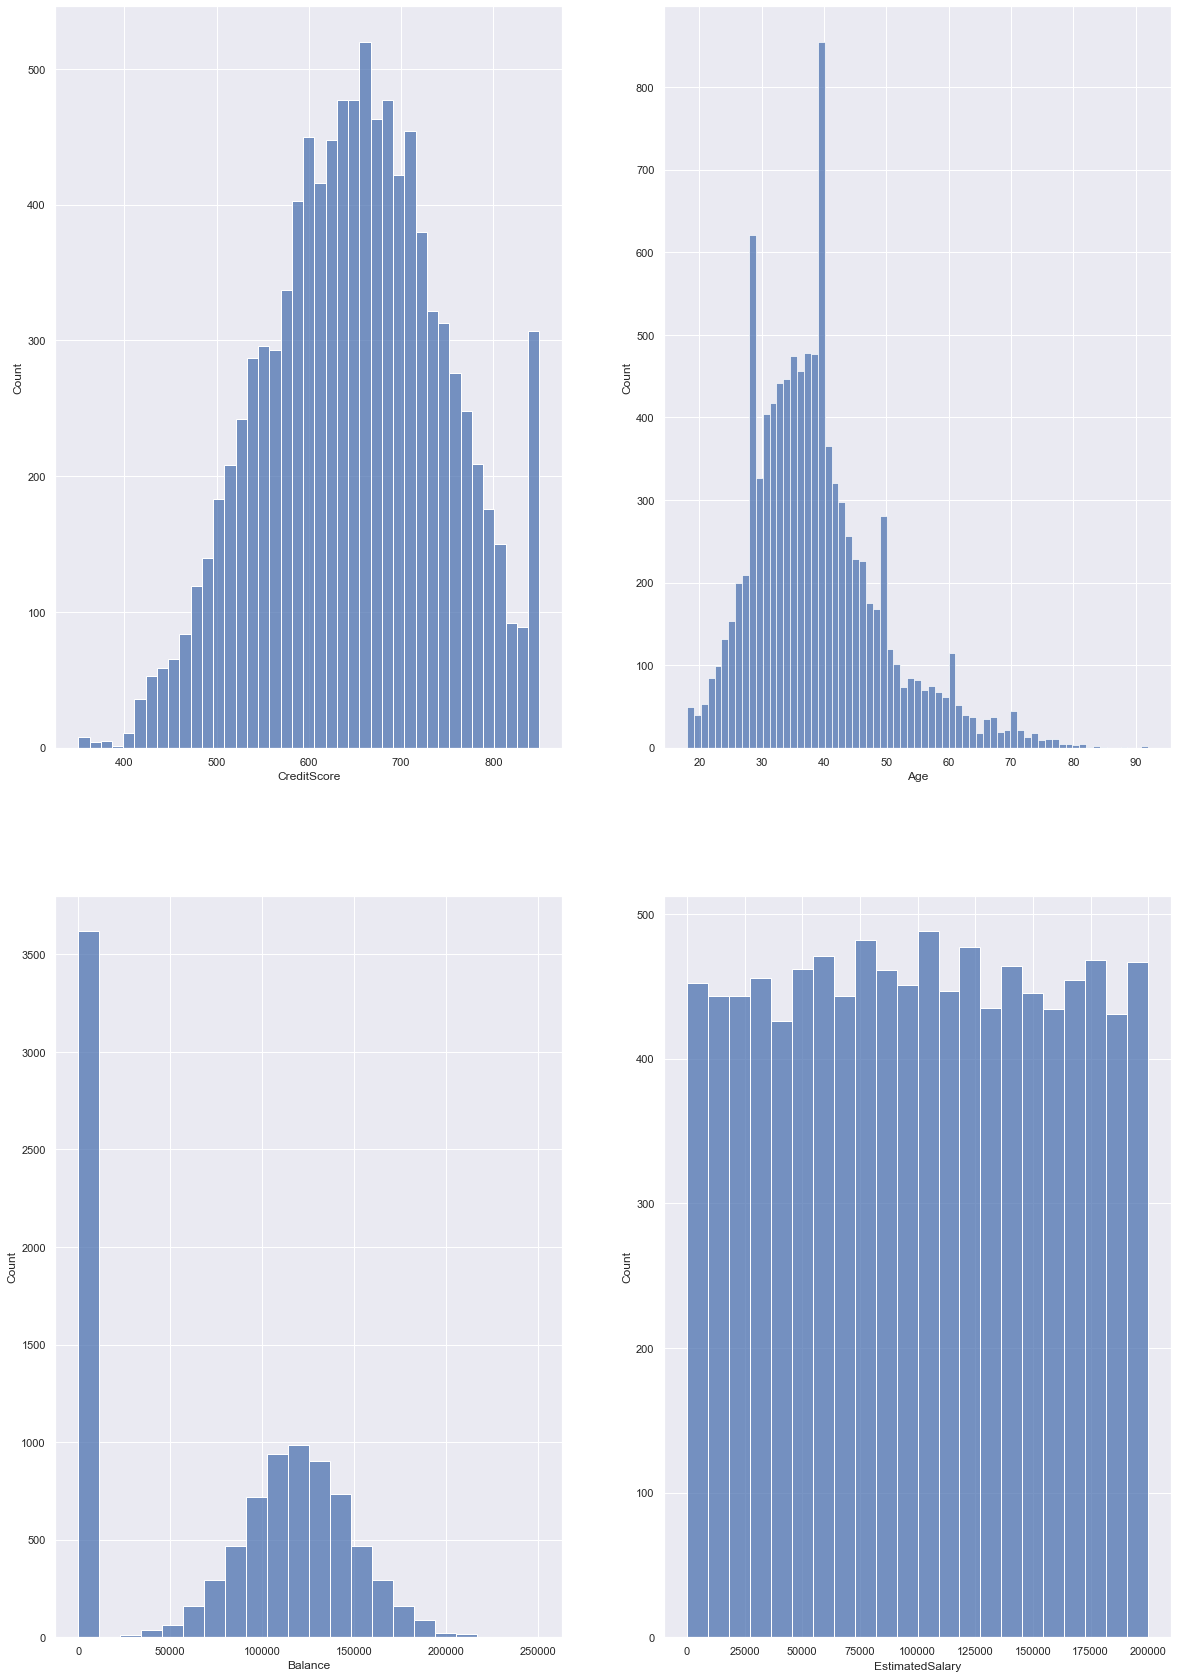

In [36]:
# histogram plot

plt.figure(figsize = (10,5))
fig,axs = plt.subplots(2,2)
with sns.axes_style("whitegrid"):
    sns.histplot(data = df_copy,x = "CreditScore",ax=axs[0,0])
    sns.histplot(data = df_copy,x = "Age",ax=axs[0,1])
    sns.histplot(data = df_copy,x = "Balance",ax=axs[1,0])
    sns.histplot(data = df_copy,x = "EstimatedSalary",ax=axs[1,1])

### finding plethora repetition among distributions plot

In [37]:
#calcuting number of value with plethora repetition for Balance
BR=0 
BNR=0
for i in df_copy['Balance']:
    if df_copy[df_copy['Balance']==i].shape[0]>100:
        BR=BR+1
        BBR=i
    else:
        BNR=BNR+1
        BBNR=i
print( 'number of',BBR,'is',BR)
print( 'number of',BBNR,'is',BNR)
bal=[BBR]

number of 0.0 is 3617
number of 130142.79 is 6383


In [38]:
#calcuting number of value with plethora repititive for CreditScore
CR=0 
CNR=0
for i in df_copy['CreditScore']:
    if df_copy[df_copy['CreditScore']==i].shape[0]>100:
        CR=CR+1
        CCR=i
    else:
        CNR=CNR+1
        CCNR=i
print( 'number of',CCR,'is',CR)
print( 'number of',CCNR,'is',CNR)
Cred=[CCR]

number of 850 is 233
number of 792 is 9767


In [39]:
pro_balance= df_copy.groupby(['NumOfProducts','Balance']).size().to_frame(name = 'size').reset_index()
Bal_repitatio=(pro_balance[pro_balance['Balance']==BBR]['size']).to_frame().reset_index()

rep_bal_per_pro=[]
for i in Bal_repitatio['size']:
    rep_bal_per_pro.append(round(i/Bal_repitatio['size'].sum(),2))
Bal_repitatio['rep_bal_per_pro']=rep_bal_per_pro
Bal_repitatio

,index,size,rep_bal_per_pro
0,0,905,0.25
1,4179,2600,0.72
2,6170,98,0.03
3,6339,14,0.00


In [40]:
pro_Cred= df_copy.groupby(['NumOfProducts','CreditScore']).size().to_frame(name = 'size').reset_index()
Cred_repitatio=(pro_Cred[pro_Cred['CreditScore']==CCR]['size']).to_frame().reset_index()

rep_Cred_per_pro=[]
for i in Cred_repitatio['size']:
    rep_Cred_per_pro.append(round(i/Cred_repitatio['size'].sum(),2))
Cred_repitatio['rep_Cred_per_pro']=rep_Cred_per_pro
Cred_repitatio

,index,size,rep_Cred_per_pro
0,447,120,0.52
1,885,108,0.46
2,1073,3,0.01
3,1129,2,0.01


### calculating mean and variance of features with normal distribution

In [41]:
import statistics
import math

m_Balance = statistics.mean(df_copy['Balance'])
sd_Balance = statistics.stdev(df_copy['Balance'])
v_Balance = math.sqrt(sd_Balance)


In [42]:
import statistics
import math

m_Age = statistics.mean(df_copy['Age'])
sd_Age = statistics.stdev(df_copy['Age'])
v_Age = math.sqrt(sd_Age)


In [43]:
import statistics
import math

m_CreditScore = statistics.mean(df_copy['CreditScore'])
sd_CreditScore = statistics.stdev(df_copy['CreditScore'])
v_CreditScore = math.sqrt(sd_CreditScore)


### box plot of continuous featurs

<Figure size 360x360 with 0 Axes>

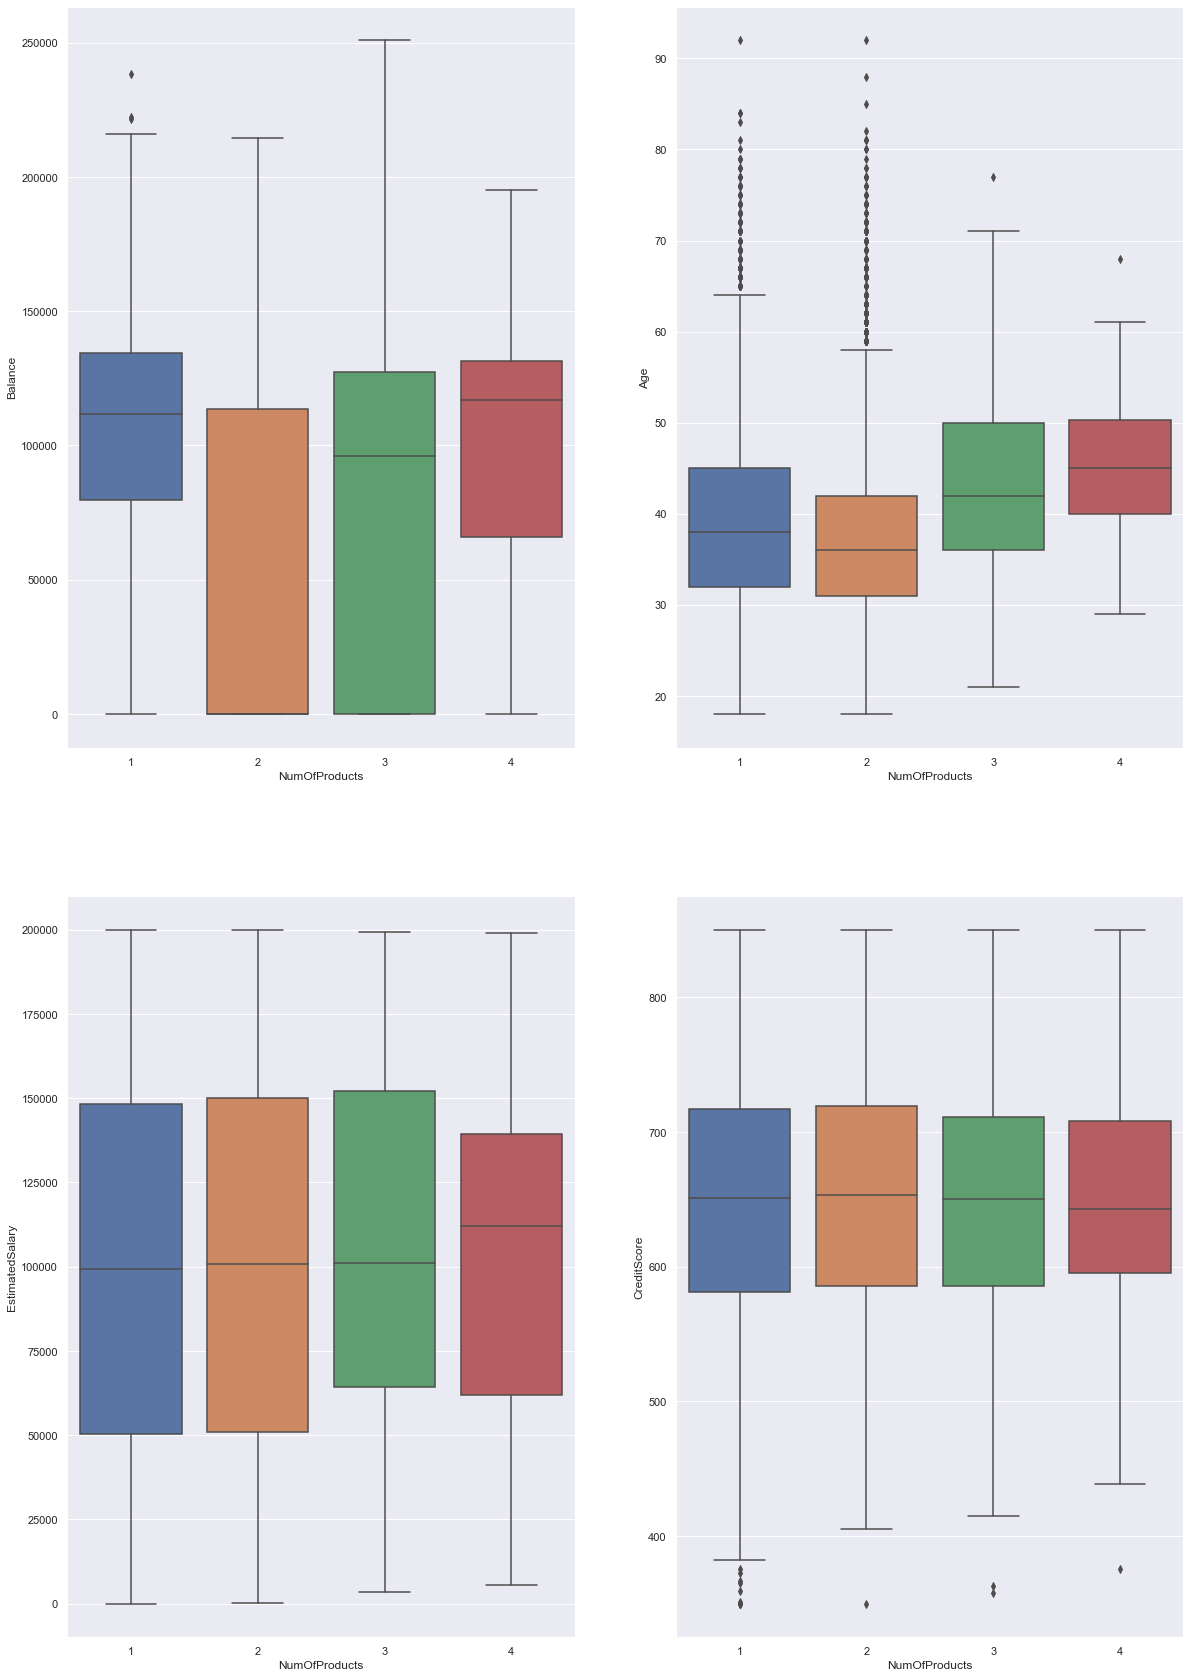

In [44]:
#box plot analysis

plt.figure(figsize = (5,5))
fig,axs = plt.subplots(2,2)
with sns.axes_style("whitegrid"):
    sns.boxplot(data = df_copy,x = "NumOfProducts",y = "Balance",ax = axs[0,0])
    sns.boxplot(data = df_copy,x = "NumOfProducts",y = "Age",ax = axs[0,1])
    sns.boxplot(data = df_copy,x = "NumOfProducts",y = "EstimatedSalary",ax = axs[1,0])
    sns.boxplot(data = df_copy,x = "NumOfProducts",y = "CreditScore",ax = axs[1,1])


In [45]:
df_copy_max=df_copy.groupby(['NumOfProducts']).max()
df_copy_min=df_copy.groupby(['NumOfProducts']).min()
# location of Balance is '3'
#location of Age is '2'
#location of EstimatedSalary is '7'

In [46]:
b=df_copy_min.columns.get_loc('Balance')
ds=np.random.uniform(df_copy_min.iloc[0,b],df_copy_max.iloc[0,b])
ds

35165.763391595654

In [47]:
df_copy['EstimatedSalary'].min()

11.58

# 3th senario

## counting the number of each feature per product

In [48]:
products2=pd.DataFrame()
products2.loc['0','share_percent_products']=0.3
products2.loc['1','share_percent_products']=0.5
products2.loc['2','share_percent_products']=0.1
products2.loc['3','share_percent_products']=0.1
products2

,share_percent_products
0,0.3
1,0.5
2,0.1
3,0.1


In [49]:
products2size=pd.DataFrame()
lable=[]
for i in range(0,4):
    lable.append(round((products2.iloc[i,0]*products.loc[i,'size'])/products.loc[i,'share_percent_products']))
products2size['size']=lable
products2size

,size
0,2991
1,4989
2,887
3,600


In [50]:
# 2th New share of Exsited per product
my_cols = ['Non-Exited','Exited']
second_crosstable_Exited= pd.DataFrame()

for i in range(0,2):
    for j in range(0,4):
        second_crosstable_Exited.loc[j,my_cols[i]]=round((Exi_ratio.iloc[j,i])*(products2.iloc[j,0])*(products.loc[j,'size']))
second_crosstable_Exited

,Non-Exited,Exited
0,2153.0,837.0
1,4590.0,399.0
2,151.0,736.0
3,0.0,600.0


In [51]:
# 2th New share of Gender per product
my_cols = ['Female','Male']
second_crosstable_Gender= pd.DataFrame()

for i in range(0,2):
    for j in range(0,4):
        second_crosstable_Gender.loc[j,my_cols[i]]=round((Gen_ratio.iloc[j,i])*(products2.iloc[j,0])*(products.loc[j,'size']))
second_crosstable_Gender

,Female,Male
0,1346.0,1645.0
1,2245.0,2744.0
2,497.0,390.0
3,378.0,222.0


In [52]:
# 2th New share of Geography per product
my_cols = ['France','Germany','Spain']
second_crosstable_Geography= pd.DataFrame()

for i in range(0,3):
    for j in range(0,4):
        second_crosstable_Geography.loc[j,my_cols[i]]=round((Geog_ratio.iloc[j,i])*(products2.iloc[j,0])*(products.loc[j,'size']))
second_crosstable_Geography

,France,Germany,Spain
0,1465.0,807.0,718.0
1,2594.0,1148.0,1297.0
2,346.0,319.0,222.0
3,288.0,240.0,72.0


In [53]:
# 2th New share of IsActiveMember per product
my_cols = ['non_Active','Active']
second_crosstable_IsActiveMember= pd.DataFrame()

for i in range(0,2):
    for j in range(0,4):
        second_crosstable_IsActiveMember.loc[j,my_cols[i]]=round((active_ratio.iloc[j,i])*(products2.iloc[j,0])*(products.loc[j,'size']))
second_crosstable_IsActiveMember

,non_Active,Active
0,1495.0,1495.0
1,2345.0,2644.0
2,514.0,372.0
3,312.0,288.0


In [54]:
# 2th New share of HasCrCard per product
my_cols = ['non_CrCard','CrCard']
second_crosstable_HasCrCard= pd.DataFrame()

for i in range(0,2):
    for j in range(0,4):
        second_crosstable_HasCrCard.loc[j,my_cols[i]]=round((CrCard_ratio.iloc[j,i])*(products2.iloc[j,0])*(products.loc[j,'size']))
second_crosstable_HasCrCard

,non_CrCard,CrCard
0,897.0,2093.0
1,1447.0,3542.0
2,257.0,630.0
3,192.0,408.0


In [55]:
# 2th New share of Tenure per product
my_cols = ['0','1','2','3','4','5','6','7','8','9','10']
second_crosstable_Tenure= pd.DataFrame()

for i in range(0,11):
    for j in range(0,4):
        second_crosstable_Tenure.loc[j,my_cols[i]]=round((Tenure_ratio.iloc[j,i])*(products2.iloc[j,0])*(products.loc[j,'size']),0)
second_crosstable_Tenure

,0,1,2,3,4,5,6,7,8,9,10
0,150.0,329.0,269.0,299.0,299.0,299.0,299.0,299.0,299.0,299.0,150.0
1,200.0,449.0,599.0,449.0,499.0,499.0,499.0,549.0,499.0,499.0,249.0
2,18.0,106.0,71.0,142.0,71.0,124.0,53.0,80.0,98.0,80.0,53.0
3,0.0,42.0,108.0,78.0,30.0,72.0,42.0,48.0,42.0,102.0,42.0


## creating new database name "df3th"

### database of categorical features

In [56]:
# Tenure
sub_df2th_Tenure= pd.DataFrame()
Tenure2=[]
NomOfProducts2=[]

if second_crosstable_Tenure.sum().sum()==len(df_copy):
    for i in range(0,11):
        for j in range(0,4):
            for k in range(0, int(second_crosstable_Tenure.iloc[j,i])):
                Tenure2.append(i)
                NomOfProducts2.append(j)
else:
    if (len(df_copy)-(second_crosstable_Tenure.sum().sum()))%(second_crosstable_Tenure.size)==0:
        for i in range(0,11):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_Tenure.iloc[j,i])+((len(df_copy)-(second_crosstable_Tenure.sum().sum()))/(second_crosstable_Tenure.size))):
                    Tenure2.append(i)
                    NomOfProducts2.append(j)
    
    else: 
        for i in range(0,11):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_Tenure.iloc[j,i])):
                    Tenure2.append(i)
                    NomOfProducts2.append(j)
                    
        i=int (next(iter(second_crosstable_Tenure.columns[(second_crosstable_Tenure == second_crosstable_Tenure.max().max()).any()].tolist()), 'no match'))
        j=int(products2.idxmax())
        for k in range(0, int(len(df_copy)-second_crosstable_Tenure.sum().sum())):
                    Tenure2.append(i)
                    NomOfProducts2.append(j)        

            
sub_df2th_Tenure['Tenure2']=Tenure2
sub_df2th_Tenure['NomOfProducts2']=NomOfProducts2

sub_df2th_Tenure

,Tenure2,NomOfProducts2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9995,2,1
9996,2,1
9997,2,1
9998,2,1


In [57]:
products2.idxmax()

share_percent_products    1
dtype: object

In [58]:
# HasCrCard
sub_df2th_HasCrCard= pd.DataFrame()
HasCrCard2=[]
NomOfProducts2=[]

if second_crosstable_HasCrCard.sum().sum()==len(df_copy):
    for i in range(0,2):
        for j in range(0,4):
            for k in range(0, int(second_crosstable_HasCrCard.iloc[j,i])):
                HasCrCard2.append(i)
                NomOfProducts2.append(j)
else:
    if (len(df_copy)-(second_crosstable_HasCrCard.sum().sum()))%(second_crosstable_HasCrCard.size)==0:
        for i in range(0,2):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_HasCrCard.iloc[j,i])+((len(df_copy)-(second_crosstable_HasCrCard.sum().sum()))/(second_crosstable_HasCrCard.size))):
                    HasCrCard2.append(i)
                    NomOfProducts2.append(j)
    
    else: 
        for i in range(0,2):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_HasCrCard.iloc[j,i])):
                    HasCrCard2.append(i)
                    NomOfProducts2.append(j)
        a=((second_crosstable_HasCrCard == second_crosstable_HasCrCard.max().max()).any()).index[((second_crosstable_HasCrCard== second_crosstable_HasCrCard.max().max()).any())]   
        i=second_crosstable_HasCrCard.columns.get_loc(a[0])
        j=int(products2.idxmax())
        for k in range(0, int(len(df_copy)-second_crosstable_HasCrCard.sum().sum())):
                    HasCrCard2.append(i)
                    NomOfProducts2.append(j)        

            
sub_df2th_HasCrCard['HasCrCard2']=HasCrCard2
#sub_df2th_HasCrCard['NomOfProducts2']=NomOfProducts2

sub_df2th_HasCrCard

,HasCrCard2
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [59]:
# IsActiveMember
sub_df2th_IsActiveMember= pd.DataFrame()
IsActiveMember2=[]
NomOfProducts2=[]

if second_crosstable_IsActiveMember.sum().sum()==len(df_copy):
    for i in range(0,2):
        for j in range(0,4):
            for k in range(0, int(second_crosstable_IsActiveMember.iloc[j,i])):
                IsActiveMember2.append(i)
                NomOfProducts2.append(j)
else:
    if (len(df_copy)-(second_crosstable_IsActiveMember.sum().sum()))%(second_crosstable_IsActiveMember.size)==0:
        for i in range(0,2):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_IsActiveMember.iloc[j,i])+((len(df_copy)-(second_crosstable_IsActiveMember.sum().sum()))/(second_crosstable_IsActiveMember.size))):
                    IsActiveMember2.append(i)
                    NomOfProducts2.append(j)
    
    else: 
        for i in range(0,2):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_IsActiveMember.iloc[j,i])):
                    IsActiveMember2.append(i)
                    NomOfProducts2.append(j)
        a=((second_crosstable_IsActiveMember == second_crosstable_IsActiveMember.max().max()).any()).index[((second_crosstable_IsActiveMember== second_crosstable_IsActiveMember.max().max()).any())]   
        i=second_crosstable_IsActiveMember.columns.get_loc(a[0])
        j=int(products2.idxmax())
        for k in range(0, int(len(df_copy)-second_crosstable_IsActiveMember.sum().sum())):
                    IsActiveMember2.append(i)
                    NomOfProducts2.append(j)        

            
sub_df2th_IsActiveMember['IsActiveMember2']=IsActiveMember2
#sub_df2th_IsActiveMember['NomOfProducts2']=NomOfProducts2

sub_df2th_IsActiveMember

,IsActiveMember2
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [60]:
# Geography
sub_df2th_Geography= pd.DataFrame()
Geography2=[]
NomOfProducts2=[]

if second_crosstable_Geography.sum().sum()==len(df_copy):
    for i in range(0,3):
        for j in range(0,4):
            for k in range(0, int(second_crosstable_Geography.iloc[j,i])):
                Geography2.append(i+1)
                NomOfProducts2.append(j)
else:
    if (len(df_copy)-(second_crosstable_Geography.sum().sum()))%(second_crosstable_Geography.size)==0:
        for i in range(0,3):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_Geography.iloc[j,i])+((len(df_copy)-(second_crosstable_Geography.sum().sum()))/(second_crosstable_Geography.size))):
                    Geography2.append(i+1)
                    NomOfProducts2.append(j)
    
    else: 
        for i in range(0,3):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_Geography.iloc[j,i])):
                    Geography2.append(i+1)
                    NomOfProducts2.append(j)
        a=((second_crosstable_Geography == second_crosstable_Geography.max().max()).any()).index[((second_crosstable_Geography== second_crosstable_Geography.max().max()).any())]   
        i=second_crosstable_Geography.columns.get_loc(a[0])
        j=int(products2.idxmax())
        for k in range(0, int(len(df_copy)-second_crosstable_Geography.sum().sum())):
                    Geography2.append(i+1)
                    NomOfProducts2.append(j)        

            
sub_df2th_Geography['Geography2']=Geography2
#sub_df2th_Geography['NomOfProducts2']=NomOfProducts2

sub_df2th_Geography

,Geography2
0,1
1,1
2,1
3,1
4,1
...,...
9995,1
9996,1
9997,1
9998,1


In [61]:
#Gender
sub_df2th_Gender= pd.DataFrame()
Gender2=[]
NomOfProducts2=[]

if second_crosstable_Gender.sum().sum()==len(df_copy):
    for i in range(0,2):
        for j in range(0,4):
            for k in range(0, int(second_crosstable_Gender.iloc[j,i])):
                Gender2.append(i)
                NomOfProducts2.append(j)
else:
    if (len(df_copy)-(second_crosstable_Gender.sum().sum()))%(second_crosstable_Gender.size)==0:
        for i in range(0,2):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_Gender.iloc[j,i])+((len(df_copy)-(second_crosstable_Gender.sum().sum()))/(second_crosstable_Gender.size))):
                    Gender2.append(i)
                    NomOfProducts2.append(j)
    
    else: 
        for i in range(0,2):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_Gender.iloc[j,i])):
                    Gender2.append(i)
                    NomOfProducts2.append(j)
        a=((second_crosstable_Gender == second_crosstable_Gender.max().max()).any()).index[((second_crosstable_Gender== second_crosstable_Gender.max().max()).any())]   
        i=second_crosstable_Gender.columns.get_loc(a[0])
        j=int(products2.idxmax())
        for k in range(0, int(len(df_copy)-second_crosstable_Gender.sum().sum())):
                    Gender2.append(i)
                    NomOfProducts2.append(j)        

            
sub_df2th_Gender['Gender2']=Gender2
#sub_df2th_Gender['NomOfProducts2']=NomOfProducts2

sub_df2th_Gender

,Gender2
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [62]:
#Exited
sub_df2th_Exited= pd.DataFrame()
Exited2=[]
NomOfProducts2=[]

if second_crosstable_Exited.sum().sum()==len(df_copy):
    for i in range(0,2):
        for j in range(0,4):
            for k in range(0, int(second_crosstable_Exited.iloc[j,i])):
                Exited2.append(i)
                NomOfProducts2.append(j)
else:
    if (len(df_copy)-(second_crosstable_Exited.sum().sum()))%(second_crosstable_Exited.size)==0:
        for i in range(0,2):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_Exited.iloc[j,i])+((len(df_copy)-(second_crosstable_Exited.sum().sum()))/(second_crosstable_Exited.size))):
                    Exited2.append(i)
                    NomOfProducts2.append(j)
    
    else: 
        for i in range(0,2):
            for j in range(0,4):
                for k in range(0, int(second_crosstable_Exited.iloc[j,i])):
                    Exited2.append(i)
                    NomOfProducts2.append(j)
        a=((second_crosstable_Exited == second_crosstable_Exited.max().max()).any()).index[((second_crosstable_Exited== second_crosstable_Exited.max().max()).any())]   
        i=second_crosstable_Exited.columns.get_loc(a[0])
        j=int(products2.idxmax())
        for k in range(0, int(len(df_copy)-second_crosstable_Exited.sum().sum())):
                    Exited2.append(i)
                    NomOfProducts2.append(j)        

            
sub_df2th_Exited['Exited2']=Exited2
#sub_df2th_Exited['NomOfProducts2']=NomOfProducts2

sub_df2th_Exited

,Exited2
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [63]:
#concat categorical DataFrame
df2th_categorical=pd.concat([sub_df2th_IsActiveMember,sub_df2th_HasCrCard,sub_df2th_Exited,sub_df2th_Geography,sub_df2th_Gender,sub_df2th_Tenure], axis=1)
df2th_categorical

,IsActiveMember2,HasCrCard2,Exited2,Geography2,Gender2,Tenure2,NomOfProducts2
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
9995,1,1,0,1,1,2,1
9996,1,1,0,1,1,2,1
9997,1,1,0,1,1,2,1
9998,1,1,0,1,1,2,1


### database of continuous features

In [64]:
#Balance
sub_df2th_Balance=pd.DataFrame()
Balance2=[]
NomOfProducts2=[]
for i in range(0,4):
    for j in range(0,int(((products2size.iloc[i,0]*Bal_repitatio.loc[i,'size'])/products.loc[i,'size']))):
        Balance2.append(BBR)
        NomOfProducts2.append(i)

        
for i in range(0,4):
    for j in range(0,int(products.loc[i,'size']-((products2size.iloc[i,0]*Bal_repitatio.loc[i,'size'])/products.loc[i,'size']))):
        Balance2.append(int(np.random.normal(m_Balance,v_Balance)))
        NomOfProducts2.append(i)
                
sub_df2th_Balance['Balance2']=Balance2
sub_df2th_Balance['NomOfProducts2']=NomOfProducts2

if len(sub_df2th_Balance)>len(df_copy):
    sub_df2th_Balance=sub_df2th_Balance.iloc[:-int(len(sub_df2th_Balance)-len(df_copy)) , :]


sub_df2th_Balance

,Balance2,NomOfProducts2
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
9995,77200.0,1
9996,76541.0,1
9997,76370.0,1
9998,77163.0,1


In [65]:
#CreditScore
sub_df2th_CreditScore=pd.DataFrame()
CreditScore2=[]
NomOfProducts2=[]
for i in range(0,4):
    for j in range(0,int(((products2size.iloc[i,0]*Cred_repitatio.loc[i,'size'])/products.loc[i,'size']))):
        CreditScore2.append(CCR)
        NomOfProducts2.append(i)
        
for i in range(0,4):
    for j in range(0,int(products.loc[i,'size']-((products2size.iloc[i,0]*Cred_repitatio.loc[i,'size'])/products.loc[i,'size']))):
        CreditScore2.append(int(np.random.normal(m_CreditScore,v_CreditScore)))
        NomOfProducts2.append(i)
        
        
sub_df2th_CreditScore['CreditScore2']=CreditScore2
sub_df2th_CreditScore['NomOfProducts2']=NomOfProducts2

#if len(sub_df2th_CreditScore)>len(df_copy):
#    sub_df2th_CreditScore=sub_df2th_CreditScore.iloc[:-int(len(sub_df2th_CreditScore)-len(df_copy)) , :]
    
if len(sub_df2th_CreditScore)<len(df_copy) :
    for i in range(0,int(len(df_copy)-len(sub_df2th_CreditScore))):
        j=int(products2.idxmax())
        sub_df2th_CreditScore=sub_df2th_CreditScore.append({'CreditScore2':int(np.random.normal(m_CreditScore,v_CreditScore)),'NomOfProducts2':j},ignore_index=True)

        
#sub_df2th_CreditScore['CreditScore2']=CreditScore2
#sub_df2th_CreditScore['NomOfProducts2']=NomOfProducts2        
sub_df2th_CreditScore

,CreditScore2,NomOfProducts2
0,850,0
1,850,0
2,850,0
3,850,0
4,850,0
...,...,...
9995,658,3
9996,653,3
9997,680,1
9998,645,1


In [66]:
#Age
sub_df2th_Age=pd.DataFrame()
Age2=[]
NomOfProducts2=[]

        
for i in range(0,4):
    for j in range(0,int(products.loc[i,'size'])):
        Age2.append(int(np.random.normal(m_Age,v_Age)))
        NomOfProducts2.append(i)
        
        
sub_df2th_Age['Age2']=Age2
sub_df2th_Age['NomOfProducts2']=NomOfProducts2
sub_df2th_Age

,Age2,NomOfProducts2
0,45,0
1,34,0
2,41,0
3,39,0
4,41,0
...,...,...
9995,45,3
9996,38,3
9997,43,3
9998,39,3


In [67]:
#EstimatedSalary
sub_df2th_EstimatedSalary=pd.DataFrame()
EstimatedSalary2=[]


        
for i in range(0,len(df_copy)):
        EstimatedSalary2.append(int(np.random.uniform(df_copy['EstimatedSalary'].min(),df_copy['EstimatedSalary'].max())))

        
        
sub_df2th_EstimatedSalary['EstimatedSalary2']=EstimatedSalary2
sub_df2th_EstimatedSalary

,EstimatedSalary2
0,171388
1,127408
2,27736
3,153563
4,29512
...,...
9995,155862
9996,162587
9997,129868
9998,183123


In [68]:
#concat continuous DataFrame
df2th_continuous=pd.concat([sub_df2th_Balance,sub_df2th_CreditScore,sub_df2th_Age,sub_df2th_EstimatedSalary], axis=1)
df2th_continuous

,Balance2,NomOfProducts2,CreditScore2,NomOfProducts2,Age2,NomOfProducts2,EstimatedSalary2
0,0.0,0,850,0,45,0,171388
1,0.0,0,850,0,34,0,127408
2,0.0,0,850,0,41,0,27736
3,0.0,0,850,0,39,0,153563
4,0.0,0,850,0,41,0,29512
...,...,...,...,...,...,...,...
9995,77200.0,1,658,3,45,3,155862
9996,76541.0,1,653,3,38,3,162587
9997,76370.0,1,680,1,43,3,129868
9998,77163.0,1,645,1,39,3,183123


In [69]:
df2th_continuous=df2th_continuous.drop(['NomOfProducts2'],axis=1)

df2th_continuous=df2th_continuous.drop(['NomOfProducts2'],axis=1)

In [70]:
#concat two new DataFrame
df2th=pd.concat([df2th_categorical,df2th_continuous], axis=1)
df2th

,IsActiveMember2,HasCrCard2,Exited2,Geography2,Gender2,Tenure2,NomOfProducts2,Balance2,CreditScore2,Age2,EstimatedSalary2
0,0,0,0,1,0,0,0,0.0,850,45,171388
1,0,0,0,1,0,0,0,0.0,850,34,127408
2,0,0,0,1,0,0,0,0.0,850,41,27736
3,0,0,0,1,0,0,0,0.0,850,39,153563
4,0,0,0,1,0,0,0,0.0,850,41,29512
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,1,1,2,1,77200.0,658,45,155862
9996,1,1,0,1,1,2,1,76541.0,653,38,162587
9997,1,1,0,1,1,2,1,76370.0,680,43,129868
9998,1,1,0,1,1,2,1,77163.0,645,39,183123


writer=pd.ExcelWriter('D:/training/data science/Rahimyan/researching/modeling/bank_3th_senario.xlsx')
df2th.to_excel(writer,'3th scenario')
writer.save()

In [84]:
from openpyxl import load_workbook

book = load_workbook('bank_all_senario.xlsx')
writer = pd.ExcelWriter('bank_all_senario.xlsx', engine='openpyxl') 
writer.book = book

df2th.to_excel(writer,sheet_name='3th_scenario')
writer.save()